In [34]:
# Libraries for Data Maipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
from helper import Helper


# Libraries for Data Visulaization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries for Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Libraries for Modeling
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# Libraris for Evaluation
from sklearn.metrics import silhouette_score

In [3]:
path = r"E:\Imarticus_ Learning\Projects_to_git\EV_station _Analysis\src\Dataset\charging_station_ml.csv"
df_world = pd.read_csv(path)
EU_COUNTRIES = [
    "AT", "BE", "BG", "HR", "CY", "CZ", "DK", "EE", "FI", "FR",
    "DE", "GR", "HU", "IE", "IT", "LV", "LT", "LU", "MT", "NL",
    "PL", "PT", "RO", "SK", "SI", "ES", "SE"
]
df_eu = df_world[df_world["country_code"].isin(EU_COUNTRIES)].copy()
df_eu.head(10)

,country_code,state_province,city,latitude,longitude,station_count,port_count,fast_station_count,fast_port_count,fast_station_share,fast_port_share,max_power_kw,median_power_kw,dc_fast_station_count,dc_ultra_station_count,has_fast_dc,has_ultra_dc
93,AT,Austria,Gänserndorf,48.340379,16.715657,1,2,0,0,0.0,0.0,22.0,22.0,0,0,0,0
94,AT,Austria,Raasdorf,48.240840,16.591911,1,4,0,0,0.0,0.0,22.0,22.0,0,0,0,0
95,AT,Bezirk Amstetten,Ardagger,48.178689,14.863834,1,1,0,0,0.0,0.0,11.0,11.0,0,0,0,0
96,AT,Bezirk Amstetten,Bezirk Amstetten,48.120352,14.861960,1,1,0,0,0.0,0.0,11.0,11.0,0,0,0,0
97,AT,Bezirk Baden,Bad Vöslau,47.960719,16.202443,1,1,0,0,0.0,0.0,11.0,11.0,0,0,0,0
98,AT,Bezirk Baden,Gemeinde Traiskirchen,47.983375,16.289499,1,2,0,0,0.0,0.0,22.0,22.0,0,0,0,0
99,AT,Bezirk Baden,Oeynhausen,47.983671,16.289616,1,1,0,0,0.0,0.0,11.0,11.0,0,0,0,0
100,AT,Bezirk Bludenz,Gemeinde Bürs,47.150747,9.812164,1,2,0,0,0.0,0.0,11.0,11.0,0,0,0,0
101,AT,Bezirk Bludenz,Gemeinde Klösterle,47.138647,10.168756,2,4,0,0,0.0,0.0,22.0,22.0,0,0,0,0
102,AT,Bezirk Bludenz,Stadt Bludenz,47.155474,9.814735,1,2,0,0,0.0,0.0,11.0,11.0,0,0,0,0


In [4]:
df_eu.shape


(28743, 17)

In [5]:
df_eu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28743 entries, 93 to 45664
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_code            28743 non-null  object 
 1   state_province          28743 non-null  object 
 2   city                    28743 non-null  object 
 3   latitude                28743 non-null  float64
 4   longitude               28743 non-null  float64
 5   station_count           28743 non-null  int64  
 6   port_count              28743 non-null  int64  
 7   fast_station_count      28743 non-null  int64  
 8   fast_port_count         28743 non-null  int64  
 9   fast_station_share      28743 non-null  float64
 10  fast_port_share         28741 non-null  float64
 11  max_power_kw            27674 non-null  float64
 12  median_power_kw         27674 non-null  float64
 13  dc_fast_station_count   28743 non-null  int64  
 14  dc_ultra_station_count  28743 non-null  in

In [6]:
df_eu.isna().sum()

country_code                 0
state_province               0
city                         0
latitude                     0
longitude                    0
station_count                0
port_count                   0
fast_station_count           0
fast_port_count              0
fast_station_share           0
fast_port_share              2
max_power_kw              1069
median_power_kw           1069
dc_fast_station_count        0
dc_ultra_station_count       0
has_fast_dc                  0
has_ultra_dc                 0
dtype: int64

In [7]:
df_eu.describe()

,latitude,longitude,station_count,port_count,fast_station_count,fast_port_count,fast_station_share,fast_port_share,max_power_kw,median_power_kw,dc_fast_station_count,dc_ultra_station_count,has_fast_dc,has_ultra_dc
count,28743.000000,28743.000000,28743.000000,28743.000000,28743.000000,28743.000000,28743.000000,28741.000000,27674.000000,27674.000000,28743.000000,28743.000000,28743.000000,28743.000000
mean,47.944908,7.798742,3.332081,8.038618,0.708451,2.359809,0.266511,0.271558,58.837716,44.262587,0.708451,0.206172,0.357200,0.134537
std,6.125229,8.730689,62.599444,80.587858,5.116440,20.209877,0.406980,0.412327,80.963999,64.058608,5.116440,1.541916,0.479183,0.341234
min,-55.811599,-134.643837,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.602483,2.784334,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,22.000000,17.000000,0.000000,0.000000,0.000000,0.000000
50%,48.261373,9.115070,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,22.000000,22.000000,0.000000,0.000000,0.000000,0.000000
75%,51.625859,12.337518,2.000000,6.000000,1.000000,2.000000,0.500000,0.555556,50.000000,50.000000,1.000000,0.000000,1.000000,0.000000
max,81.736061,166.445520,10354.000000,10594.000000,446.000000,2126.000000,1.000000,1.000000,1000.000000,550.000000,446.000000,176.000000,1.000000,1.000000


In [8]:
df_eu.duplicated().sum()

np.int64(0)

In [9]:
# If port_count > 0 and fast_port_count == 0 → fast_port_share = 0
df_eu["fast_port_share"] = df_eu["fast_port_share"].fillna(0)

# EDA for this Dataset

In [10]:
df_eu.loc[df_eu['max_power_kw'].isna()]

,country_code,state_province,city,latitude,longitude,station_count,port_count,fast_station_count,fast_port_count,fast_station_share,fast_port_share,max_power_kw,median_power_kw,dc_fast_station_count,dc_ultra_station_count,has_fast_dc,has_ultra_dc
251,AT,Mistelbach,Wolkersdorf,48.381259,16.518676,1,2,0,0,0.0,0.0,NaN,NaN,0,0,0,0
286,AT,Niederösterreich,Sulz im Wienerwald,48.101142,16.140187,1,2,0,0,0.0,0.0,NaN,NaN,0,0,0,0
289,AT,Niederösterreich,Wiener Neustadt (Stadt),47.822970,16.214901,1,1,0,0,0.0,0.0,NaN,NaN,0,0,0,0
432,AT,Tyrol,Kitzbühel,47.447216,12.391961,1,2,0,0,0.0,0.0,NaN,NaN,0,0,0,0
867,AT,Österreich,Wiener Neustadt,47.806520,16.249606,2,2,0,0,0.0,0.0,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,SI,UNKNOWN,Miren-Kostanjevica,45.891672,13.605374,1,2,0,0,0.0,0.0,NaN,NaN,0,0,0,0
45470,SI,UNKNOWN,Pivka,45.668236,14.188931,1,2,0,0,0.0,0.0,NaN,NaN,0,0,0,0
45499,SI,UNKNOWN,Šempeter pri Gorici,45.930125,13.638341,1,2,0,0,0.0,0.0,NaN,NaN,0,0,0,0
45639,SK,UNKNOWN,Trenčín-Zlatovce,48.891919,18.007635,1,1,0,0,0.0,0.0,NaN,NaN,0,0,0,0


In [11]:
# The missing values are due to the absent of the Fast chaging port and station so what they have is the Normal AC charges
# the normal AC charging range is from 22Kw which is the median of the feature and Median is robust to outliers
ac_median_power = df_eu.loc[
    (df_eu["has_fast_dc"] == 0) & (df_eu["median_power_kw"].notna()),
    "median_power_kw"].median() # calculating the median from the cities that has no fast_dc
print(f'AC_Median_power : {ac_median_power}')
ac_max_power = df_eu.loc[
    (df_eu["has_fast_dc"] == 0) & (df_eu["max_power_kw"].notna()),
    "max_power_kw"].median() # calculating the median from the cities that has no fast_dc
print(f'AC_max_power : {ac_max_power}')
df_eu.loc[(df_eu["has_fast_dc"] == 0) & (df_eu["median_power_kw"].isna()), "median_power_kw"] = ac_median_power
df_eu.loc[(df_eu["has_fast_dc"] == 0) & (df_eu["max_power_kw"].isna()), "max_power_kw"] = ac_max_power

AC_Median_power : 22.0
AC_max_power : 22.0


In [12]:
for i in df_eu:
    print(f' Column Name : {i}')
    print(df_eu[i].unique().tolist())
    print('\n')

 Column Name : country_code
['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK']


 Column Name : state_province
['Austria', 'Bezirk Amstetten', 'Bezirk Baden', 'Bezirk Bludenz', 'Bezirk Bregenz', 'Bezirk Bruck an der Leitha', 'Bezirk Feldkirch', 'Bezirk Gmunden', 'Bezirk Gänserndorf', 'Bezirk Hollabrunn', 'Bezirk Imst', 'Bezirk Innsbruck-Land', 'Bezirk Kitzbühel', 'Bezirk Landeck', 'Bezirk Liezen', 'Bezirk Mistelbach', 'Bezirk Mödling', 'Bezirk Oberwart', 'Bezirk Reutte', 'Bezirk Sankt Veit an der Glan', 'Bezirk Scheibbs', 'Bezirk Schwaz', 'Bezirk Spittal an der Drau', 'Bezirk St. Johann im Pongau', 'Bezirk St. Pölten', 'Bezirk Wiener Neustadt', 'Bezirk Zell am See', 'Burgenland', 'Carinthia', 'Falkert', 'Feldkirch', 'Felsőpulyai járás', 'Graz', 'Graz-Umgebung', 'Hartberg-Fürstenfeld', 'Hermagor', 'Innsbruck', 'Innsbruck-Land', 'Innsbruck-Stadt', 'Kernten', 'Kitzbühel', 'Kufst

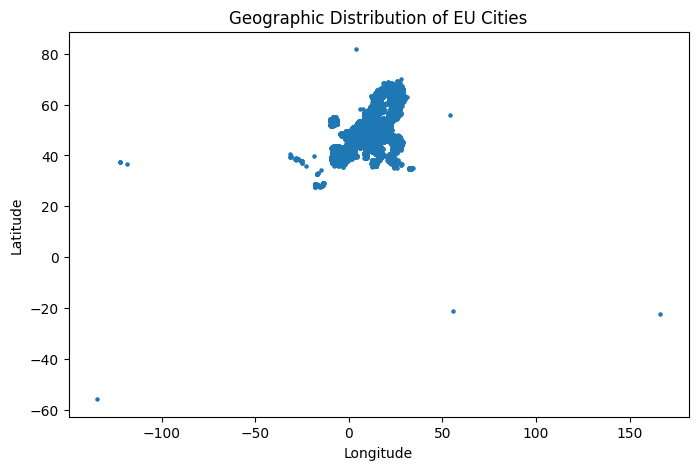

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(df_eu['longitude'], df_eu['latitude'], s=5)
plt.title('Geographic Distribution of EU Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


- The spatial distribution confirms strong geographic density with a few extreme coordinate outliers, supporting the use of a clustering algorithm that can handle noise.

array([[<Axes: title={'center': 'station_count'}>,
        <Axes: title={'center': 'port_count'}>],
       [<Axes: title={'center': 'fast_station_share'}>,
        <Axes: title={'center': 'fast_port_share'}>],
       [<Axes: title={'center': 'median_power_kw'}>,
        <Axes: title={'center': 'max_power_kw'}>]], dtype=object)

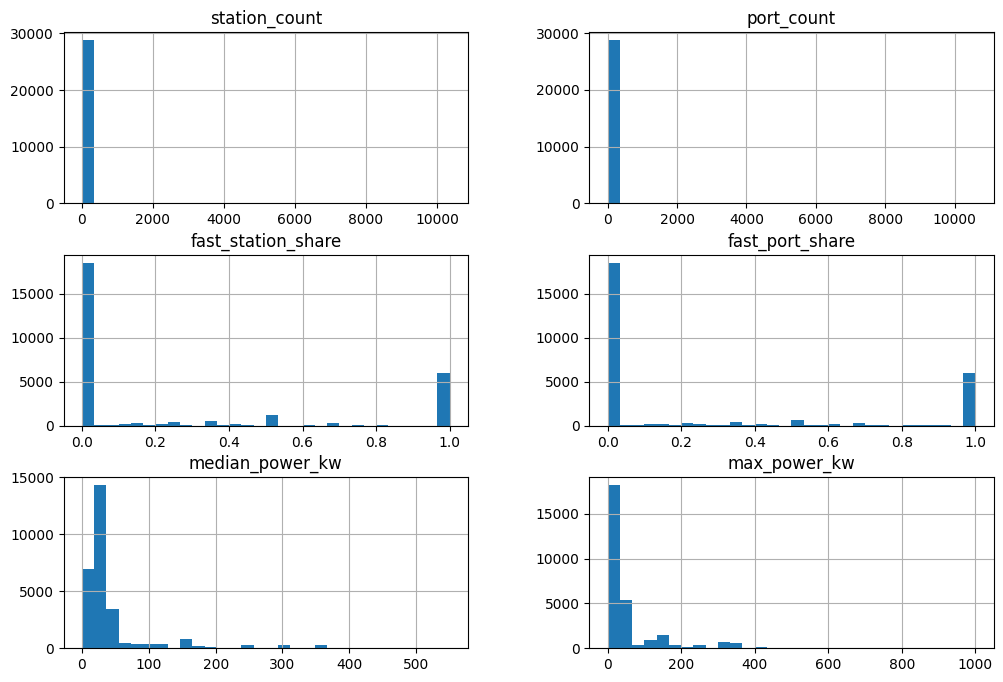

In [14]:
num_cols = [
    "station_count",
    "port_count",
    "fast_station_share",
    "fast_port_share",
    "median_power_kw",
    'max_power_kw'
]

df_eu[num_cols].hist(bins=30, figsize=(12,8))


- station_count & port_count
  - Heavily right-skewed
  - Long tail driven by large cities
  - Confirms count bias

- fast_station_share & fast_port_share
  - Bimodal
  - Many cities near 0 or 1
  - Clear infrastructure maturity split

- median_power_kw and max_power_kw 
  - Right-skewed

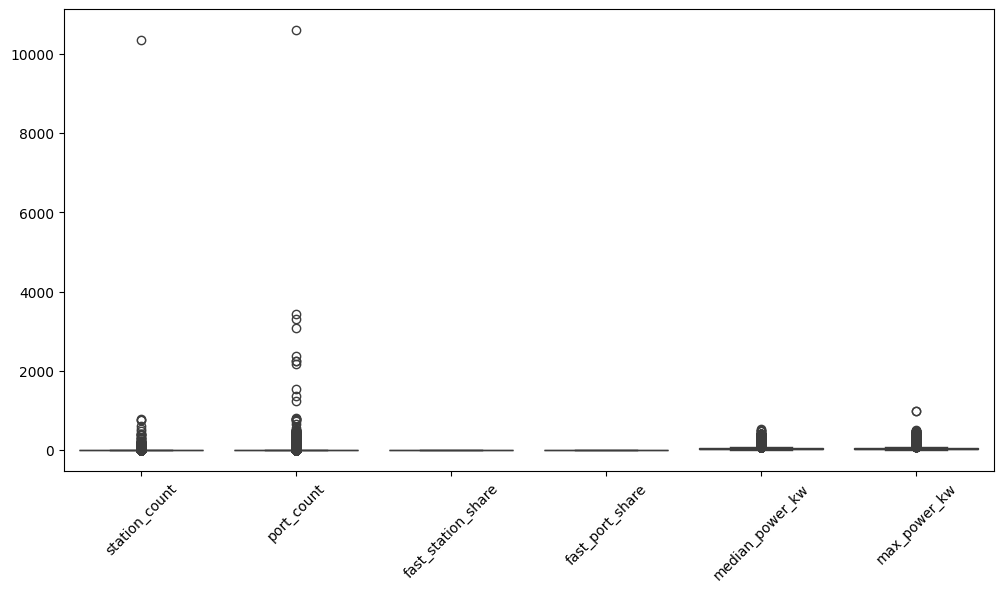

In [15]:
# Outlier Detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df_eu[num_cols])
plt.xticks(rotation=45)
plt.show()


In [16]:
# Clearly from the box plot we can see there is an outlier so identified it and removeing it 
df_eu.drop(df_eu.loc[df_eu['port_count'] > 4500].index,inplace=True)
df_eu.drop(df_eu.loc[df_eu['station_count'] > 2000].index, inplace = True)


In [17]:
# Fast stations cannot exceed total stations
print((df_eu["fast_station_count"] > df_eu["station_count"]).sum())

# Fast ports cannot exceed total ports
print((df_eu["fast_port_count"] > df_eu["port_count"]).sum())

# Shares must be between 0 and 1
print(((df_eu["fast_station_share"] < 0) | (df_eu["fast_station_share"] > 1)).sum())
print(((df_eu["fast_port_share"] < 0) | (df_eu["fast_port_share"] > 1)).sum())


0
0
0
0


<Axes: xlabel='station_count', ylabel='port_count'>

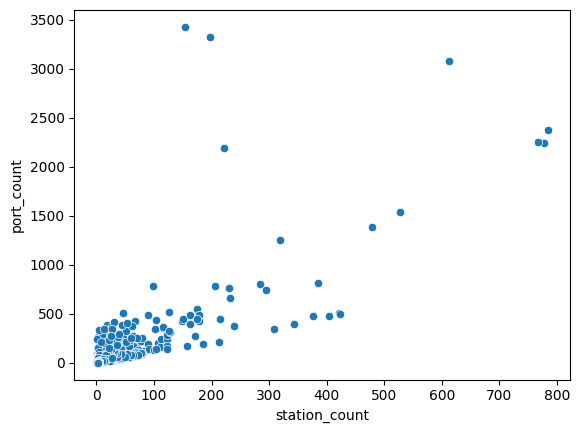

In [18]:
sns.scatterplot(
    x="station_count",
    y="port_count",
    data=df_eu
)


- From the above scatter plot we can identify the is a as station count increase the port count also increases

<Axes: xlabel='median_power_kw', ylabel='fast_station_share'>

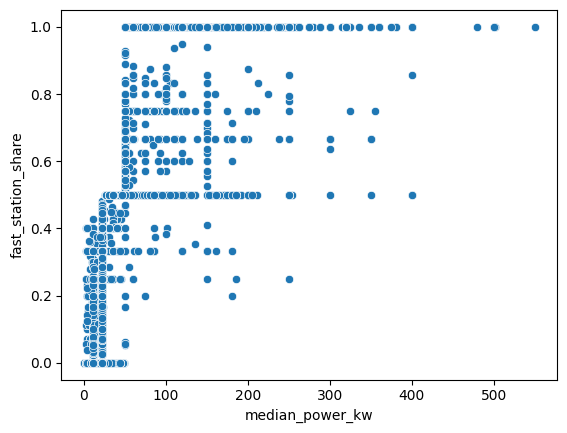

In [19]:
sns.scatterplot(
    x="median_power_kw",
    y="fast_station_share",
    data=df_eu
)


df_eu['median_power_log'] = np.log1p(df_eu['median_power_kw'])  - log transform this for easy calculation and use it for DBscan

The scatter shows a clear threshold effect: once median charging power crosses DC-fast levels, the share of fast-charging stations rises sharply, indicating distinct infrastructure maturity stages rather than a linear relationship.

<Axes: xlabel='max_power_kw', ylabel='fast_station_share'>

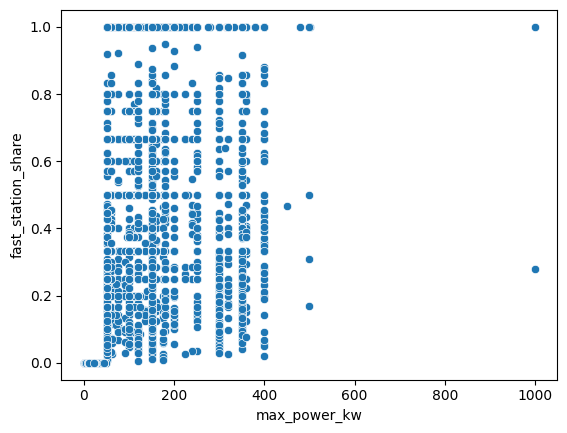

In [20]:
sns.scatterplot(
    x="max_power_kw",
    y="fast_station_share",
    data=df_eu
)


do not use it as it does not have clear relationship try any other feature selection method for to check

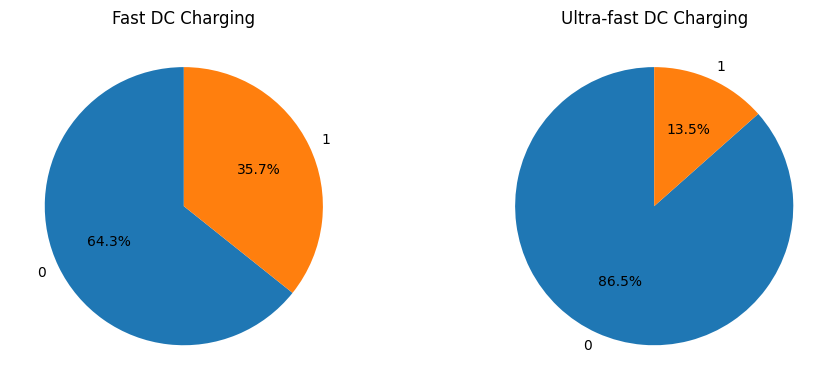

In [21]:
fast_charge = df_eu["has_fast_dc"].value_counts(normalize=True)
ultra_fast_charge = df_eu["has_ultra_dc"].value_counts(normalize=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Fast DC
axes[0].pie(
    fast_charge,
    labels=fast_charge.index,
    autopct='%1.1f%%',
    startangle=90
)
axes[0].set_title("Fast DC Charging")

# Ultra-fast DC
axes[1].pie(
    ultra_fast_charge,
    labels=ultra_fast_charge.index,
    autopct='%1.1f%%',
    startangle=90
)
axes[1].set_title("Ultra-fast DC Charging")

plt.tight_layout()
plt.show()

- Fast charging is not yet mainstream

- Ultra-fast charging is elite, hub-centric infrastructur

<Axes: >

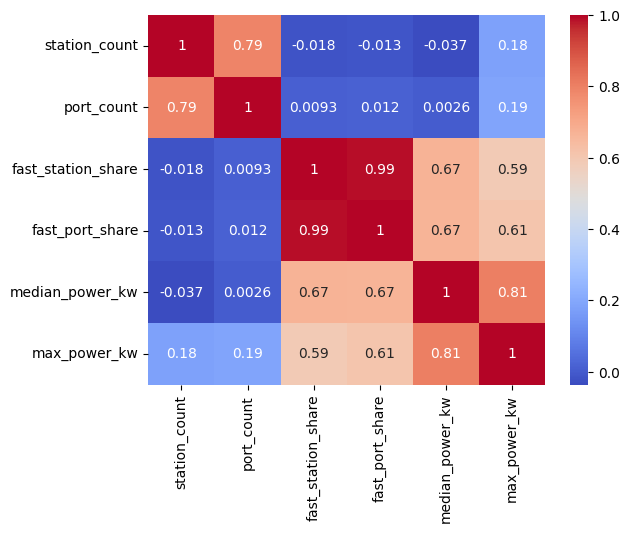

In [22]:
corr = df_eu[num_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")


Station_count ↔ port_count → 0.79

- Redundant → don’t use both

Fast_station_share ↔ fast_port_share → 0.99

- Essentially the same signal → choose one

Median_power_kw ↔ fast shares → 0.67

- Strong but not perfect → complementary feature

# Feature Selection

Based on the EDA observation we can drop these columns 

| Feature           | Reason                                    |
| ----------------- | ----------------------------------------- |
| `station_count`   | Size-biased, redundant                    |
| `port_count`      | Highly correlated with station_count and we are take technology mature not connecter availbility maturity   |
| `fast_port_share` | 99% correlated with fast_station_share    |
| `max_power_kw`    | Discrete, noisy, extreme outliers         |
| `has_fast_dc`     | Binary, already captured by share         |
| `has_ultra_dc`    | Binary, already captured by power & share |


In [23]:
# Checking for any null values as model reqiries no nulls
df_eu.isnull().sum()

country_code              0
state_province            0
city                      0
latitude                  0
longitude                 0
station_count             0
port_count                0
fast_station_count        0
fast_port_count           0
fast_station_share        0
fast_port_share           0
max_power_kw              0
median_power_kw           0
dc_fast_station_count     0
dc_ultra_station_count    0
has_fast_dc               0
has_ultra_dc              0
dtype: int64

In [24]:
# Log Transformation for median_power_kw 
df_eu['median_power_log'] = np.log1p(df_eu['median_power_kw'])



In [25]:
df_eu['dc_fast_share']  = df_eu['dc_fast_station_count'] / df_eu['station_count']
df_eu['dc_ultra_share'] = df_eu['dc_ultra_station_count'] / df_eu['station_count']

# optional safety for divide-by-zero if any station_count=0
df_eu[['dc_fast_share','dc_ultra_share']] = df_eu[['dc_fast_share','dc_ultra_share']].fillna(0)


In [26]:
# Selected Features

X = df_eu[[
    'fast_station_share',
    'dc_fast_share',
    'dc_ultra_share',
    'median_power_log'
]]

In [27]:
X_scaled = StandardScaler().fit_transform(X)


# Modelling

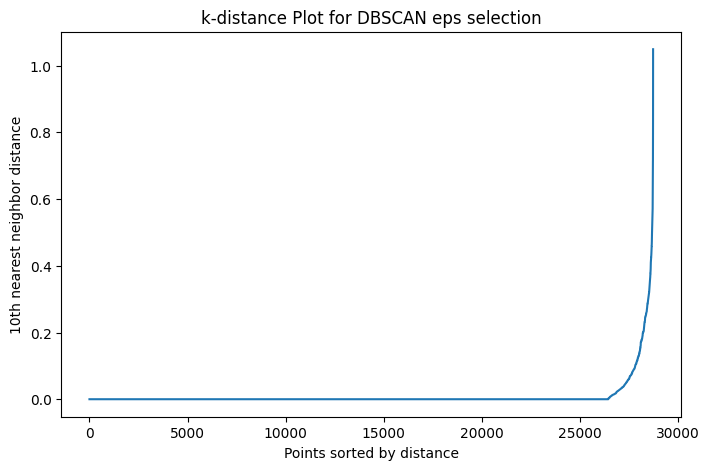

In [32]:
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])

plt.figure(figsize=(8,5))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('10th nearest neighbor distance')
plt.title('k-distance Plot for DBSCAN eps selection')
plt.show()

In [35]:
def eval_dbscan(X_scaled, eps, min_samples):
    labels = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X_scaled)
    n_noise = np.mean(labels == -1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    # silhouette only if at least 2 clusters (excluding noise)
    mask = labels != -1
    sil = None
    if n_clusters >= 2 and mask.sum() > 10:
        sil = silhouette_score(X_scaled[mask], labels[mask])
    return n_clusters, n_noise, sil

for ms in [8, 10, 12, 15]:
    for eps in [0.10, 0.12, 0.14]:
        n_clusters, noise, sil = eval_dbscan(X_scaled, eps, ms)
        print(f"min_samples={ms}, eps={eps:.2f} -> clusters={n_clusters}, noise={noise:.3f}, silhouette={sil}")

min_samples=8, eps=0.10 -> clusters=39, noise=0.024, silhouette=0.3234548902284526
min_samples=8, eps=0.12 -> clusters=33, noise=0.021, silhouette=0.32413006381847387
min_samples=8, eps=0.14 -> clusters=31, noise=0.018, silhouette=0.32393512690967563
min_samples=10, eps=0.10 -> clusters=33, noise=0.028, silhouette=0.4625734900495985
min_samples=10, eps=0.12 -> clusters=28, noise=0.023, silhouette=0.33371972549703965
min_samples=10, eps=0.14 -> clusters=29, noise=0.020, silhouette=0.32253973929143953
min_samples=12, eps=0.10 -> clusters=31, noise=0.031, silhouette=0.4671671999767962
min_samples=12, eps=0.12 -> clusters=24, noise=0.026, silhouette=0.42237781998560864
min_samples=12, eps=0.14 -> clusters=24, noise=0.022, silhouette=0.32649485137531176
min_samples=15, eps=0.10 -> clusters=25, noise=0.034, silhouette=0.4685567469324163
min_samples=15, eps=0.12 -> clusters=23, noise=0.028, silhouette=0.48104421385904256
min_samples=15, eps=0.14 -> clusters=21, noise=0.025, silhouette=0.47667

from the above analysis, 
min_samples = 15
eps = 0.12 is recommended

| Metric     | Value    | Why it’s good                  |
| ---------- | -------- | ------------------------------ |
| Clusters   | 23       | Rich structure, not fragmented |
| Noise      | 2.8%     | Clean separation               |
| Silhouette | **0.48** | Excellent separation           |
| Stability  | High     | Consistent behavior            |


In [36]:
dbscan = DBSCAN(
    eps=0.12,
    min_samples=15
)

clusters = dbscan.fit_predict(X_scaled)

In [37]:
df_model = df_eu.loc[X.index].copy()
df_model['cluster'] = clusters


In [38]:
df_model['cluster'].value_counts()


cluster
 0     20175
 3      3711
 1      2001
 2       889
-1       793
 4       262
 11      195
 7       178
 8        97
 9        51
 5        47
 10       40
 15       36
 12       35
 18       33
 6        32
 16       30
 13       26
 17       24
 14       21
 22       20
 21       19
 19       18
 20        9
Name: count, dtype: int64

In [39]:
profile = df_model.groupby('cluster')[[
    'fast_station_share',
    'median_power_kw',
    'dc_fast_station_count',
    'dc_ultra_station_count',
    'has_fast_dc',
    'has_ultra_dc'
]].mean().sort_values('fast_station_share')

profile


,fast_station_share,median_power_kw,dc_fast_station_count,dc_ultra_station_count,has_fast_dc,has_ultra_dc
cluster,,,,,,
0,0.019489,18.232610,0.307162,0.054870,0.084857,0.021660
10,0.250000,15.358750,1.125000,0.000000,1.000000,0.000000
9,0.250182,22.020588,1.156863,1.137255,1.000000,1.000000
6,0.330002,11.003125,1.281250,0.000000,1.000000,0.000000
8,0.333333,22.028866,1.061856,1.061856,1.000000,1.000000
20,0.333333,49.555556,1.111111,0.000000,1.000000,0.000000
18,0.334055,37.190909,1.242424,0.000000,1.000000,0.000000
12,0.392954,22.128571,2.885714,1.514286,1.000000,1.000000
4,0.500000,121.170420,1.141221,1.141221,1.000000,1.000000


In [40]:
df_model['maturity_segment'] = 'Developing EV Infrastructure'

# Emerging
df_model.loc[
    (df_model['fast_station_share'] < 0.25) &
    (df_model['median_power_kw'] < 30),
    'maturity_segment'
] = 'Emerging EV Infrastructure'

# Mature Fast-Charging Hubs
df_model.loc[
    (df_model['fast_station_share'] >= 0.60) &
    (df_model['median_power_kw'] >= 80) &
    (df_model['has_ultra_dc'] == 1),
    'maturity_segment'
] = 'Mature Fast-Charging Hub'


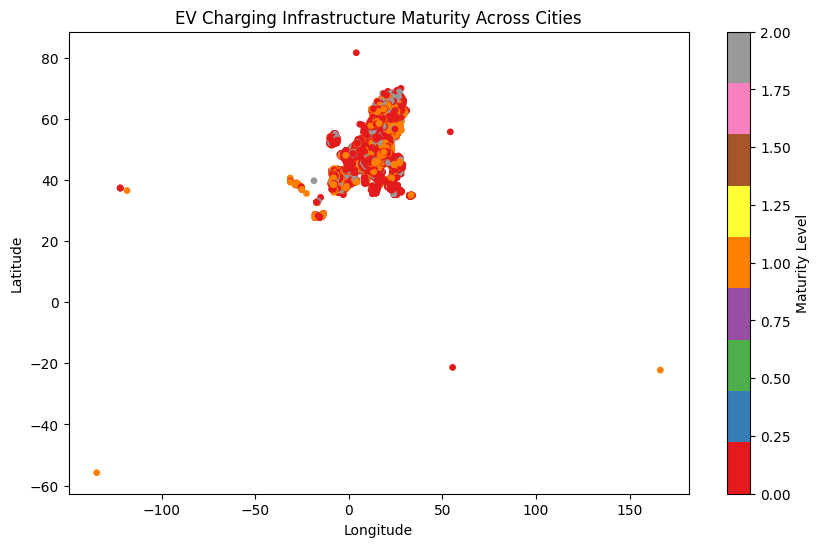

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(
    df_model['longitude'],
    df_model['latitude'],
    c=df_model['maturity_segment'].map({
        'Emerging EV Infrastructure': 0,
        'Developing EV Infrastructure': 1,
        'Mature Fast-Charging Hub': 2
    }),
    cmap='Set1',
    s=15
)
plt.title('EV Charging Infrastructure Maturity Across Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Maturity Level')
plt.show()


In [41]:
df_model.head()

,country_code,state_province,city,latitude,longitude,station_count,port_count,fast_station_count,fast_port_count,fast_station_share,fast_port_share,max_power_kw,median_power_kw,dc_fast_station_count,dc_ultra_station_count,has_fast_dc,has_ultra_dc,median_power_log,dc_fast_share,dc_ultra_share,cluster,maturity_segment
93,AT,Austria,Gänserndorf,48.340379,16.715657,1,2,0,0,0.0,0.0,22.0,22.0,0,0,0,0,3.135494,0.0,0.0,0,Emerging EV Infrastructure
94,AT,Austria,Raasdorf,48.240840,16.591911,1,4,0,0,0.0,0.0,22.0,22.0,0,0,0,0,3.135494,0.0,0.0,0,Emerging EV Infrastructure
95,AT,Bezirk Amstetten,Ardagger,48.178689,14.863834,1,1,0,0,0.0,0.0,11.0,11.0,0,0,0,0,2.484907,0.0,0.0,0,Emerging EV Infrastructure
96,AT,Bezirk Amstetten,Bezirk Amstetten,48.120352,14.861960,1,1,0,0,0.0,0.0,11.0,11.0,0,0,0,0,2.484907,0.0,0.0,0,Emerging EV Infrastructure
97,AT,Bezirk Baden,Bad Vöslau,47.960719,16.202443,1,1,0,0,0.0,0.0,11.0,11.0,0,0,0,0,2.484907,0.0,0.0,0,Emerging EV Infrastructure


In [42]:
df_model['maturity_segment'].value_counts()

maturity_segment
Emerging EV Infrastructure      19211
Developing EV Infrastructure     7110
Mature Fast-Charging Hub         2421
Name: count, dtype: int64

In [43]:
df_model.groupby('maturity_segment')[[
    'fast_station_share',
    'median_power_kw',
    'has_fast_dc',
    'has_ultra_dc'
]].mean()


,fast_station_share,median_power_kw,has_fast_dc,has_ultra_dc
maturity_segment,,,,
Developing EV Infrastructure,0.723390,52.270000,0.963713,0.155556
Emerging EV Infrastructure,0.007343,17.727299,0.051689,0.017646
Mature Fast-Charging Hub,0.981374,221.486989,1.000000,1.000000


In [48]:
export_cols = [
    'country_code',
    'state_province',
    'city',
    'latitude',
    'longitude',

    # Final business output
    'maturity_segment',

    # Key metrics for visuals / tooltips
    'fast_station_share',
    'median_power_kw',
    'has_fast_dc',
    'has_ultra_dc',
    'dc_fast_station_count',
    'dc_ultra_station_count',

    # Optional (for drill-down)
    'station_count',
    'port_count'
]

df_export = df_model[export_cols].copy()


In [49]:
df_export.head()



,country_code,state_province,city,latitude,longitude,maturity_segment,fast_station_share,median_power_kw,has_fast_dc,has_ultra_dc,dc_fast_station_count,dc_ultra_station_count,station_count,port_count
93,AT,Austria,Gänserndorf,48.340379,16.715657,Emerging EV Infrastructure,0.0,22.0,0,0,0,0,1,2
94,AT,Austria,Raasdorf,48.240840,16.591911,Emerging EV Infrastructure,0.0,22.0,0,0,0,0,1,4
95,AT,Bezirk Amstetten,Ardagger,48.178689,14.863834,Emerging EV Infrastructure,0.0,11.0,0,0,0,0,1,1
96,AT,Bezirk Amstetten,Bezirk Amstetten,48.120352,14.861960,Emerging EV Infrastructure,0.0,11.0,0,0,0,0,1,1
97,AT,Bezirk Baden,Bad Vöslau,47.960719,16.202443,Emerging EV Infrastructure,0.0,11.0,0,0,0,0,1,1


In [50]:
df_export['maturity_segment'].value_counts()


maturity_segment
Emerging EV Infrastructure      19211
Developing EV Infrastructure     7110
Mature Fast-Charging Hub         2421
Name: count, dtype: int64

In [51]:
df_export.isna().sum()

country_code              0
state_province            0
city                      0
latitude                  0
longitude                 0
maturity_segment          0
fast_station_share        0
median_power_kw           0
has_fast_dc               0
has_ultra_dc              0
dc_fast_station_count     0
dc_ultra_station_count    0
station_count             0
port_count                0
dtype: int64

In [52]:
df_export.to_csv(
    'ev_charging_maturity_powerbi.csv',
    index=False
)